In [247]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')




In [248]:
store_data = pd.read_csv('D:\\Data Science Roadmap and Practice\\Machine Learning Projects\\Market_Pulse_Analyzing_Popularity_Patterns_for_Apparel_Brands\\notebook\\Data\\store_data.csv')
store_data

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944000,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900000,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931000,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000000,0.1090,0.0677,109.560,186507,3
...,...,...,...,...,...,...,...,...,...,...,...,...
18203,0.403,0.28100,6,-10.365,0,0.4540,0.000000,0.1060,0.1820,112.881,232880,4
18204,0.481,0.01140,4,-26.196,1,0.9910,0.967000,0.0985,0.3430,57.748,155500,4
18205,0.168,0.00908,5,-33.966,0,0.9470,0.946000,0.1250,0.3960,68.775,172500,4
18206,0.598,0.65800,1,-7.159,0,0.3890,0.000000,0.5820,0.4730,106.807,152558,4


In [249]:
store_data.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [250]:
store_data.tail()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
18203,0.403,0.28100,6,-10.365,0,0.454,0.000000,0.1060,0.182,112.881,232880,4
18204,0.481,0.01140,4,-26.196,1,0.991,0.967000,0.0985,0.343,57.748,155500,4
18205,0.168,0.00908,5,-33.966,0,0.947,0.946000,0.1250,0.396,68.775,172500,4
18206,0.598,0.65800,1,-7.159,0,0.389,0.000000,0.5820,0.473,106.807,152558,4
18207,0.582,0.32400,2,-10.284,1,0.807,0.000034,0.1500,0.249,88.755,237293,3


In [251]:
store_data.isnull().sum()

Store_Ratio       0
Basket_Ratio      0
Category_1        0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
popularity        0
dtype: int64

In [252]:
store_data.duplicated().sum()

2923

In [253]:
column_name = ['Store_Ratio','Basket_Ratio','Category_1','Store_Score','Category_2','Store_Presence','Score_1','Score_2','Score_3','Score_4','time','popularity']
store_data = store_data.drop_duplicates(subset=column_name)

In [254]:
store_data.duplicated().sum()

0

In [255]:
store_data.shape

(15285, 12)

In [256]:
store_data = store_data.rename( columns ={
    'Store_Ratio' : 'store_ratio',
    'Basket_Ratio' : 'basket_ratio',
    'Category_1' : 'category_1',
    'Store_Score' : 'store_score',
    'Category_2' : 'category_2',
    'Store_Presence' : 'store_presence',
    'Score_1' : 'score_1',
    'Score_2' : 'score_2',
    'Score_3' : 'score_3',
    'Score_4' : 'score_4'
}
)
store_data 

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.99200,0.944000,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.94400,0.900000,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.03870,0.000000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.84900,0.931000,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.93700,0.000000,0.1090,0.0677,109.560,186507,3
...,...,...,...,...,...,...,...,...,...,...,...,...
18201,0.846,0.54400,0,-7.403,1,0.00142,0.861000,0.1040,0.2250,140.005,261930,4
18202,0.709,0.62000,10,-4.138,1,0.42500,0.000000,0.0822,0.6580,154.026,192571,4
18203,0.403,0.28100,6,-10.365,0,0.45400,0.000000,0.1060,0.1820,112.881,232880,4
18206,0.598,0.65800,1,-7.159,0,0.38900,0.000000,0.5820,0.4730,106.807,152558,4


In [257]:
store_data.head()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [258]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15285 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   store_ratio     15285 non-null  float64
 1   basket_ratio    15285 non-null  float64
 2   category_1      15285 non-null  int64  
 3   store_score     15285 non-null  float64
 4   category_2      15285 non-null  int64  
 5   store_presence  15285 non-null  float64
 6   score_1         15285 non-null  float64
 7   score_2         15285 non-null  float64
 8   score_3         15285 non-null  float64
 9   score_4         15285 non-null  float64
 10  time            15285 non-null  int64  
 11  popularity      15285 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.5 MB


In [260]:
store_data.describe()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
count,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,1.528500e+04,15285.000000
mean,0.548290,0.498163,5.137782,-11.741641,0.646189,0.463499,0.303094,0.165802,0.430720,115.912332,2.222829e+05,3.852993
std,0.201223,0.297053,3.542558,7.989707,0.478167,0.376327,0.405763,0.136753,0.273821,31.186151,1.011309e+05,0.536710
min,0.000000,0.000216,0.000000,-47.576000,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,3.184400e+04,0.000000
25%,0.419000,0.232000,2.000000,-15.338000,0.000000,0.079200,0.000000,0.094600,0.193000,91.990000,1.726670e+05,4.000000
50%,0.577000,0.532000,5.000000,-8.977000,1.000000,0.404000,0.001490,0.113000,0.405000,114.991000,2.079000e+05,4.000000
75%,0.701000,0.749000,8.000000,-5.893000,1.000000,0.871000,0.833000,0.180000,0.653000,135.027000,2.512680e+05,4.000000
max,0.998000,1.000000,11.000000,-0.079000,1.000000,0.996000,1.000000,0.991000,0.999000,219.701000,3.908467e+06,5.000000


In [261]:
numerical_feature = [feature for feature in store_data.columns if store_data[feature].dtype != 'O']
categorical_feature = [feature for feature in store_data.columns if store_data[feature].dtype == 'O']

In [262]:
store_data[numerical_feature]

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.99200,0.944000,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.94400,0.900000,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.03870,0.000000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.84900,0.931000,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.93700,0.000000,0.1090,0.0677,109.560,186507,3
...,...,...,...,...,...,...,...,...,...,...,...,...
18201,0.846,0.54400,0,-7.403,1,0.00142,0.861000,0.1040,0.2250,140.005,261930,4
18202,0.709,0.62000,10,-4.138,1,0.42500,0.000000,0.0822,0.6580,154.026,192571,4
18203,0.403,0.28100,6,-10.365,0,0.45400,0.000000,0.1060,0.1820,112.881,232880,4
18206,0.598,0.65800,1,-7.159,0,0.38900,0.000000,0.5820,0.4730,106.807,152558,4


In [263]:
store_data[numerical_feature].corr()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
store_ratio,1.000000,0.453653,0.042702,0.579793,-0.096637,-0.450610,-0.429869,-0.042446,0.615432,0.107917,-0.075877,0.232360
basket_ratio,0.453653,1.000000,0.048168,0.821896,-0.108873,-0.811553,-0.583105,0.257677,0.519984,0.255437,0.077245,0.205037
category_1,0.042702,0.048168,1.000000,0.041479,-0.148276,-0.046148,-0.032720,0.017054,0.039376,0.002141,-0.008862,0.003255
store_score,0.579793,0.821896,0.041479,1.000000,-0.081731,-0.707084,-0.703222,0.136806,0.508327,0.261071,0.050414,0.207316
category_2,-0.096637,-0.108873,-0.148276,-0.081731,1.000000,0.096904,0.012108,-0.034441,-0.040082,-0.034771,-0.015498,-0.034166
store_presence,-0.450610,-0.811553,-0.046148,-0.707084,0.096904,1.000000,0.535580,-0.179129,-0.411032,-0.217470,-0.050624,-0.196013
score_1,-0.429869,-0.583105,-0.032720,-0.703222,0.012108,0.535580,1.000000,-0.098179,-0.457041,-0.194036,-0.076290,-0.158218
score_2,-0.042446,0.257677,0.017054,0.136806,-0.034441,-0.179129,-0.098179,1.000000,0.035843,0.018684,-0.003450,-0.002890
score_3,0.615432,0.519984,0.039376,0.508327,-0.040082,-0.411032,-0.457041,0.035843,1.000000,0.175598,-0.004532,0.177397
score_4,0.107917,0.255437,0.002141,0.261071,-0.034771,-0.217470,-0.194036,0.018684,0.175598,1.000000,0.022467,0.045690


<Axes: >

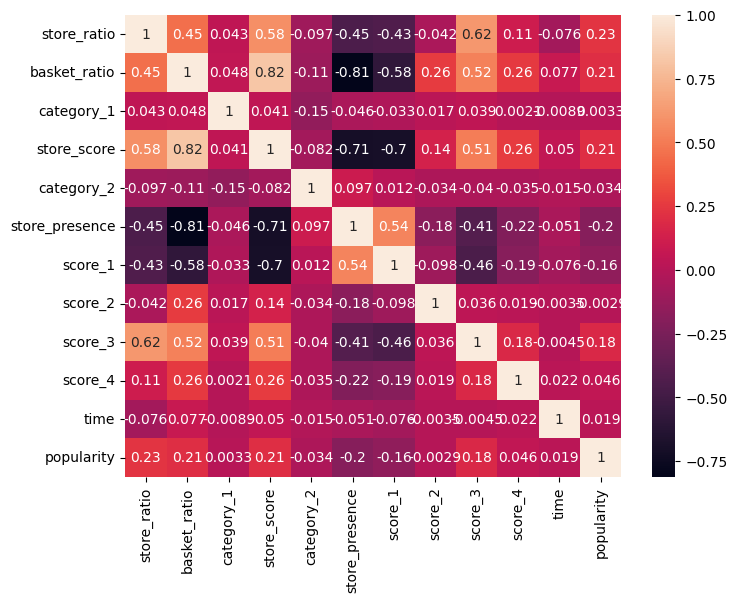

In [264]:
plt.figure(figsize=(8,6))
sns.heatmap(store_data[numerical_feature].corr(),annot = True)

In [265]:
store_data[numerical_feature].head()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [266]:
store_data.loc[store_data[numerical_feature]['store_score'] > 0]

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity


In [267]:
store_data[numerical_feature]

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.99200,0.944000,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.94400,0.900000,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.03870,0.000000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.84900,0.931000,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.93700,0.000000,0.1090,0.0677,109.560,186507,3
...,...,...,...,...,...,...,...,...,...,...,...,...
18201,0.846,0.54400,0,-7.403,1,0.00142,0.861000,0.1040,0.2250,140.005,261930,4
18202,0.709,0.62000,10,-4.138,1,0.42500,0.000000,0.0822,0.6580,154.026,192571,4
18203,0.403,0.28100,6,-10.365,0,0.45400,0.000000,0.1060,0.1820,112.881,232880,4
18206,0.598,0.65800,1,-7.159,0,0.38900,0.000000,0.5820,0.4730,106.807,152558,4


In [268]:
print(store_data[numerical_feature]['category_1'].unique())

[ 2  0  9  4  6  3 10  5  8  1  7 11]


In [269]:
print(store_data[numerical_feature]['category_2'].unique())

[1 0]


In [270]:
store_data[numerical_feature].head()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


<Figure size 800x600 with 0 Axes>

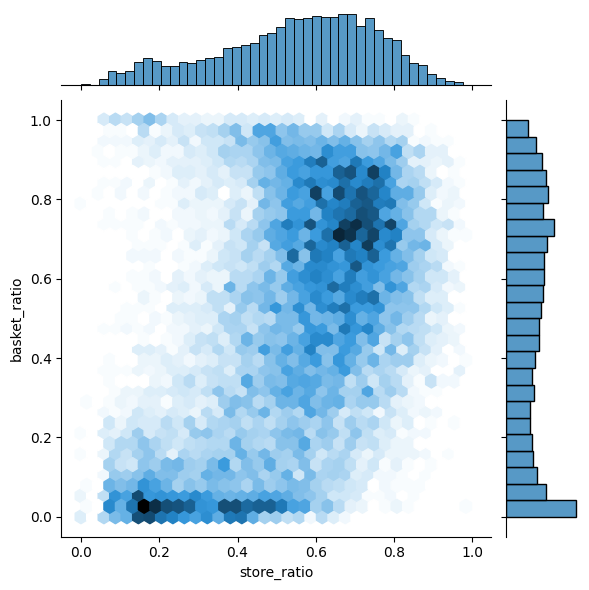

In [271]:
plt.figure(figsize=(8,6))
sns.jointplot(x = 'store_ratio', y = 'basket_ratio', data = store_data[numerical_feature], kind = 'hex')

In [272]:
store_data[numerical_feature].describe()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
count,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,15285.000000,1.528500e+04,15285.000000
mean,0.548290,0.498163,5.137782,-11.741641,0.646189,0.463499,0.303094,0.165802,0.430720,115.912332,2.222829e+05,3.852993
std,0.201223,0.297053,3.542558,7.989707,0.478167,0.376327,0.405763,0.136753,0.273821,31.186151,1.011309e+05,0.536710
min,0.000000,0.000216,0.000000,-47.576000,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,3.184400e+04,0.000000
25%,0.419000,0.232000,2.000000,-15.338000,0.000000,0.079200,0.000000,0.094600,0.193000,91.990000,1.726670e+05,4.000000
50%,0.577000,0.532000,5.000000,-8.977000,1.000000,0.404000,0.001490,0.113000,0.405000,114.991000,2.079000e+05,4.000000
75%,0.701000,0.749000,8.000000,-5.893000,1.000000,0.871000,0.833000,0.180000,0.653000,135.027000,2.512680e+05,4.000000
max,0.998000,1.000000,11.000000,-0.079000,1.000000,0.996000,1.000000,0.991000,0.999000,219.701000,3.908467e+06,5.000000


<Figure size 800x600 with 0 Axes>

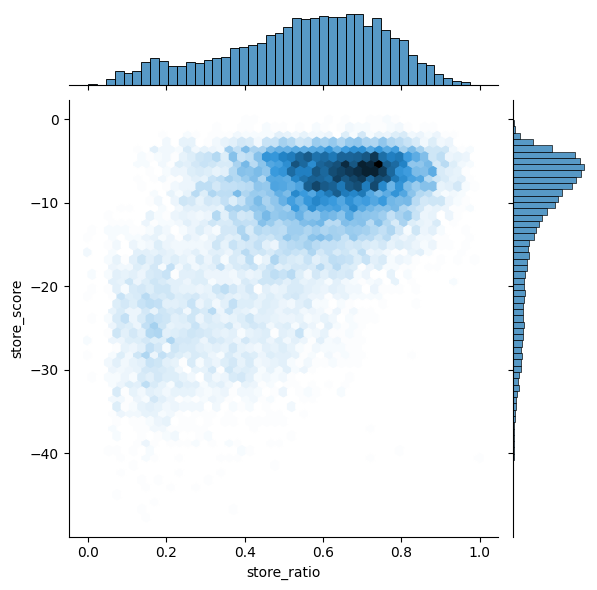

In [273]:
plt.figure(figsize=(8,6))
sns.jointplot(x = 'store_ratio', y = 'store_score', data = store_data[numerical_feature], kind = 'hex')

<Figure size 800x600 with 0 Axes>

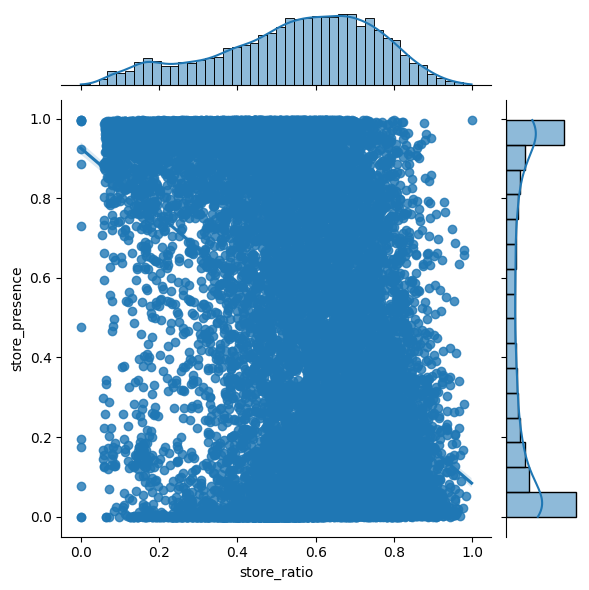

In [274]:
plt.figure(figsize=(8,6))
sns.jointplot(x = 'store_ratio', y = 'store_presence', data = store_data[numerical_feature], kind = 'reg')

<Figure size 800x600 with 0 Axes>

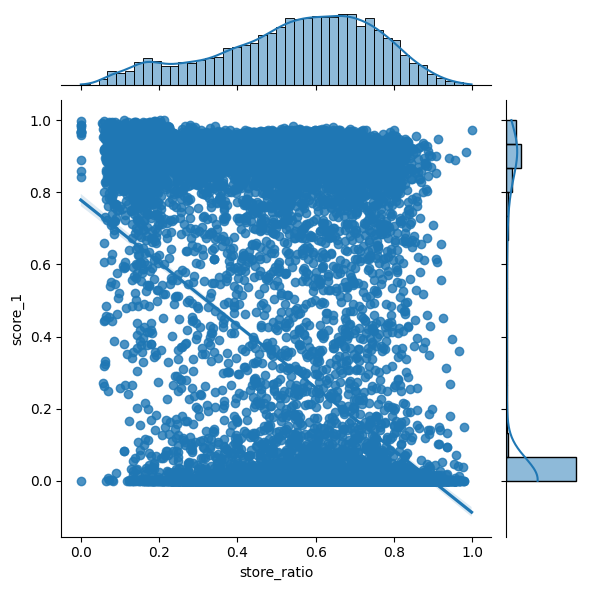

In [275]:
plt.figure(figsize=(8,6))
sns.jointplot(x = 'store_ratio', y = 'score_1', data = store_data[numerical_feature], kind = 'reg')

<Figure size 800x600 with 0 Axes>

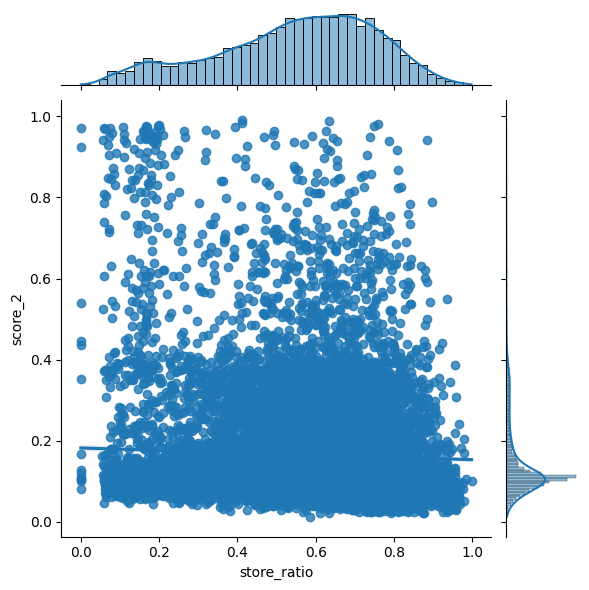

In [276]:
plt.figure(figsize=(8,6))
sns.jointplot(x = 'store_ratio', y = 'score_2', data = store_data[numerical_feature], kind = 'reg')

<Figure size 800x600 with 0 Axes>

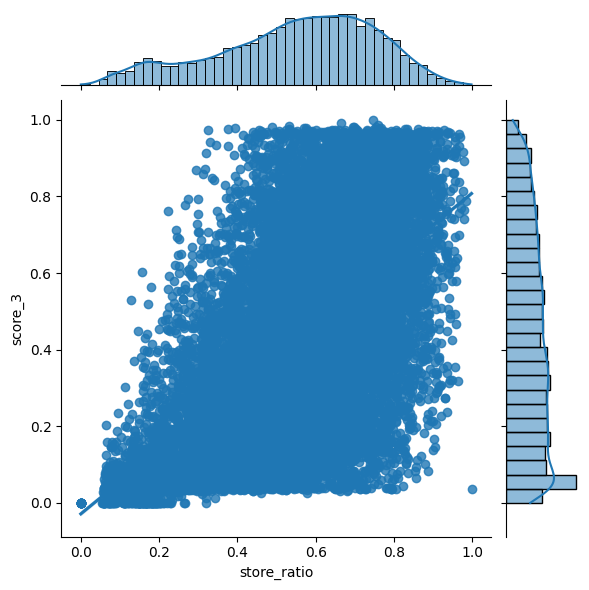

In [277]:
plt.figure(figsize=(8,6))
sns.jointplot(x = 'store_ratio', y = 'score_3', data = store_data[numerical_feature], kind = 'reg')

<Figure size 800x600 with 0 Axes>

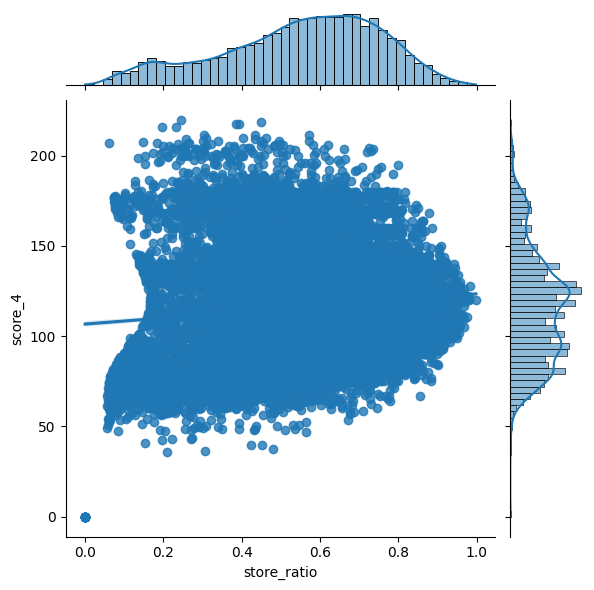

In [278]:
plt.figure(figsize=(8,6))
sns.jointplot(x = 'store_ratio', y = 'score_4', data = store_data[numerical_feature], kind = 'reg')

<Axes: xlabel='store_ratio'>

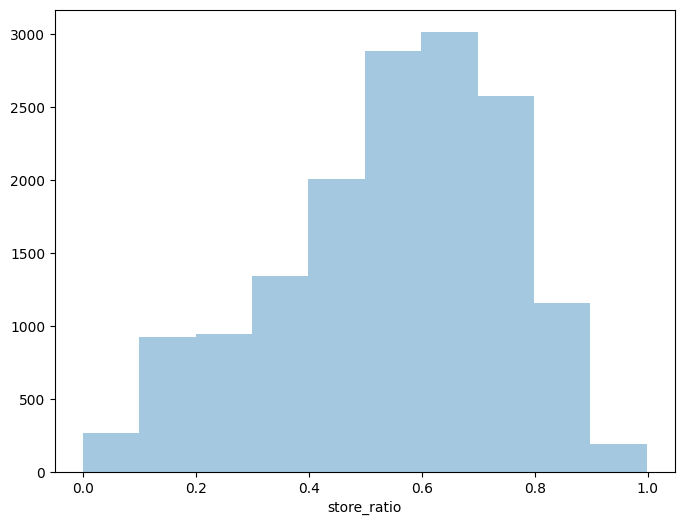

In [279]:
plt.figure(figsize=(8,6))
sns.distplot(store_data[numerical_feature]['store_ratio'], kde = False, bins = 10 )

<Axes: xlabel='basket_ratio'>

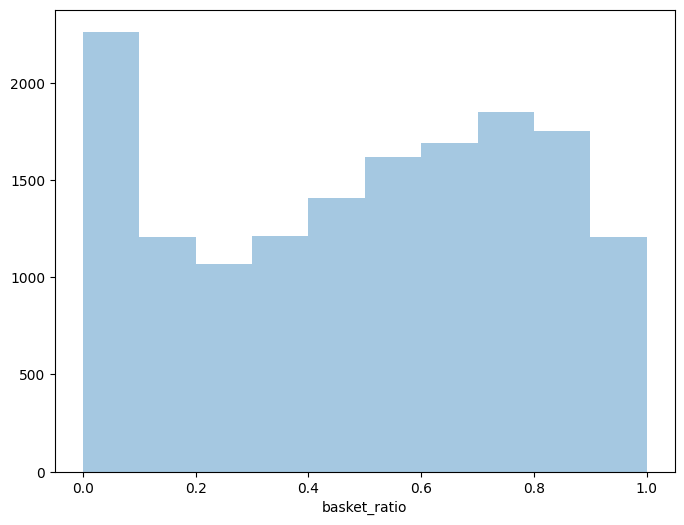

In [280]:
plt.figure(figsize=(8,6))
sns.distplot(store_data[numerical_feature]['basket_ratio'], kde = False, bins = 10 )

<Axes: xlabel='store_score'>

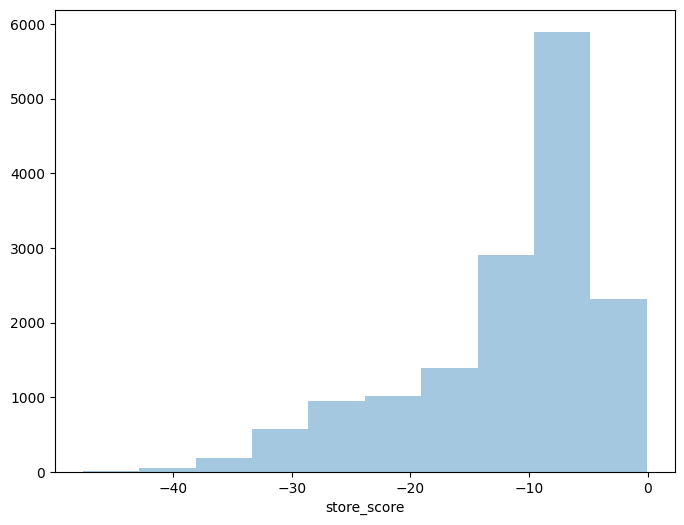

In [281]:
plt.figure(figsize=(8,6))
sns.distplot(store_data[numerical_feature]['store_score'], kde = False, bins = 10 )

<Axes: xlabel='store_presence'>

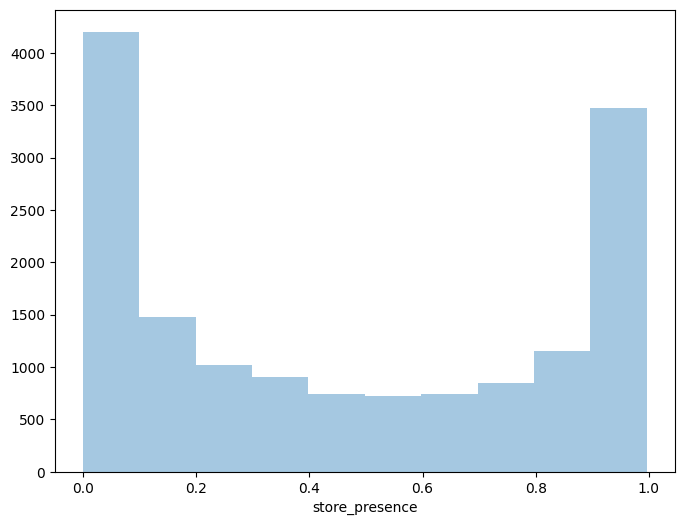

In [282]:
plt.figure(figsize=(8,6))
sns.distplot(store_data[numerical_feature]['store_presence'], kde = False, bins = 10 )

<Axes: xlabel='score_1'>

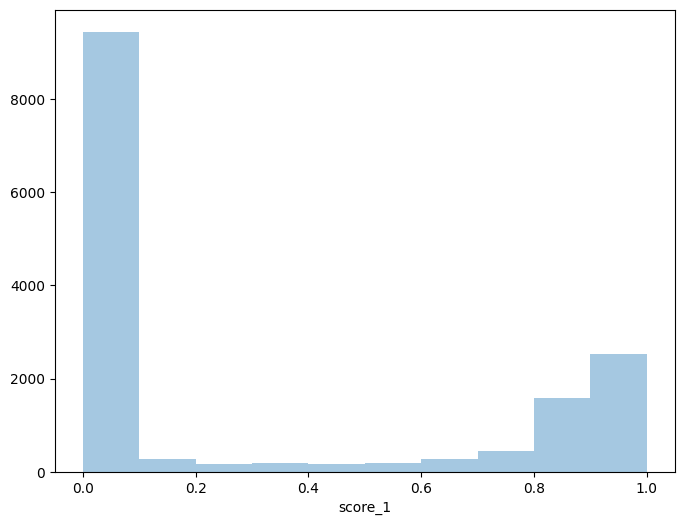

In [283]:
plt.figure(figsize=(8,6))
sns.distplot(store_data[numerical_feature]['score_1'], kde = False, bins = 10 )

<Axes: xlabel='score_2'>

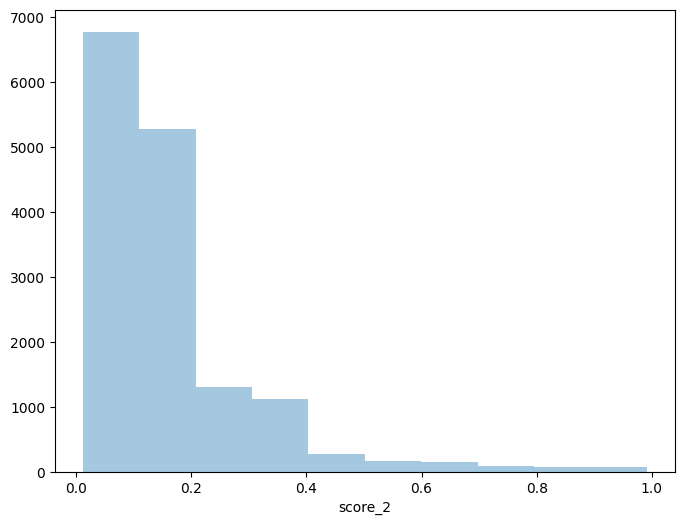

In [284]:
plt.figure(figsize=(8,6))
sns.distplot(store_data[numerical_feature]['score_2'], kde = False, bins = 10 )

<Axes: xlabel='score_3'>

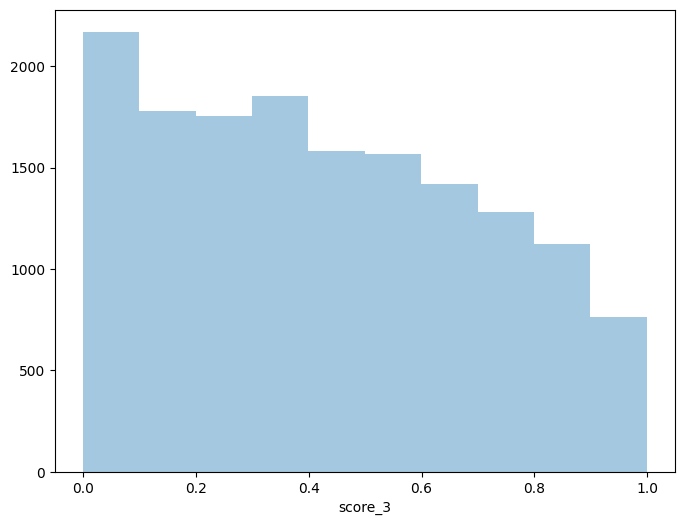

In [285]:
plt.figure(figsize=(8,6))
sns.distplot(store_data[numerical_feature]['score_3'], kde = False, bins = 10 )

<Axes: xlabel='score_4'>

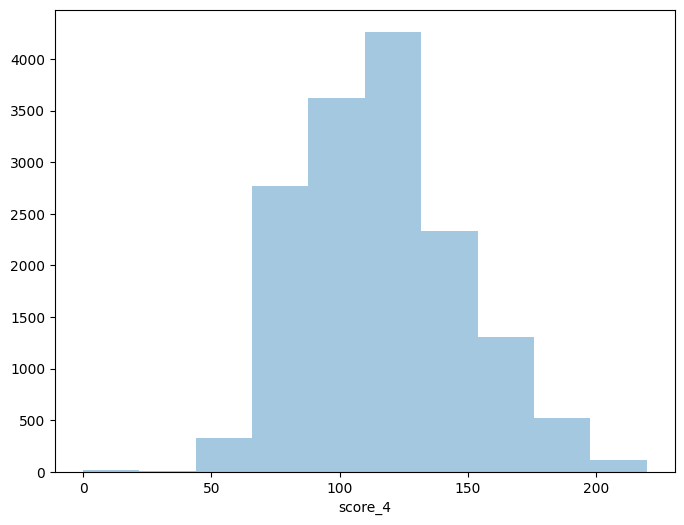

In [286]:
plt.figure(figsize=(8,6))
sns.distplot(store_data[numerical_feature]['score_4'], kde = False, bins = 10 )

In [287]:
store_data.head()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [306]:
store_data['time_zscore'] = ((store_data['time'] - store_data['time'].mean()) / store_data['time'].std())
store_data.describe()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,...,store_ratio_zscore,basket_ratio_zscore,store_score_zscore,sstore_presence_zscore,store_presence_zscore,score_1_zscore,score_2_zscore,score_3_zscore,score_4_zscore,time_zscore
count,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,...,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,14748.000000,1.474800e+04
mean,0.553216,0.496379,5.140561,-11.553587,0.646867,0.463394,0.299099,0.150041,0.434331,116.168345,...,0.024478,-0.006006,0.023537,0.008251,0.008251,-0.001556,-0.117931,0.000985,0.000479,1.281559e-16
std,0.197774,0.293924,3.542184,7.690371,0.477960,0.375724,0.404314,0.095974,0.271721,30.856941,...,0.982857,0.989468,0.962535,1.001150,1.001150,0.999592,0.700274,0.999375,0.991088,1.000000e+00
min,0.055200,0.000585,0.000000,-35.694000,0.000000,0.000000,0.000000,0.011900,0.000000,35.822000,...,-2.450463,-1.675048,-2.997902,-1.226504,-1.226504,-0.741022,-1.125882,-1.596463,-2.580151,-1.897469e+00
25%,0.427000,0.234000,2.000000,-15.075000,0.000000,0.079700,0.000000,0.094100,0.199000,92.044750,...,-0.602765,-0.889279,-0.417207,-1.014136,-1.014136,-0.741022,-0.526109,-0.864551,-0.774342,-4.899058e-01
50%,0.580000,0.530000,5.000000,-8.908500,1.000000,0.405000,0.001345,0.112000,0.409000,115.046000,...,0.157584,0.107177,0.354599,-0.147346,-0.147346,-0.737697,-0.395501,-0.092182,-0.035570,-1.415318e-01
75%,0.703000,0.745000,8.000000,-5.879000,1.000000,0.869000,0.829000,0.168000,0.654000,135.131000,...,0.768845,0.830954,0.733774,1.089023,1.089023,1.308525,0.013104,0.808914,0.609537,2.898710e-01
max,0.984000,1.000000,11.000000,-0.079000,1.000000,0.996000,0.999000,0.577000,0.999000,209.383000,...,2.165303,1.689388,1.459708,1.427426,1.427426,1.728818,2.997379,2.077806,2.994423,3.671128e+01


In [307]:
store_data = store_data.loc[(store_data['time_zscore'] >= -3) & (store_data['time_zscore'] <= 3)]
store_data.describe()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,...,store_ratio_zscore,basket_ratio_zscore,store_score_zscore,sstore_presence_zscore,store_presence_zscore,score_1_zscore,score_2_zscore,score_3_zscore,score_4_zscore,time_zscore
count,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,...,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000
mean,0.555216,0.498322,5.145266,-11.494526,0.647426,0.460529,0.296216,0.150123,0.435729,116.233881,...,0.034418,0.000536,0.030929,0.000615,0.000615,-0.008683,-0.117339,0.006125,0.002584,-0.061204
std,0.196838,0.293574,3.543245,7.673157,0.477788,0.375165,0.403594,0.096003,0.271242,30.872602,...,0.978204,0.988289,0.960380,0.999661,0.999661,0.997812,0.700485,0.997614,0.991591,0.692746
min,0.055200,0.000585,0.000000,-35.694000,0.000000,0.000000,0.000000,0.011900,0.000000,35.822000,...,-2.450463,-1.675048,-2.997902,-1.226504,-1.226504,-0.741022,-1.125882,-1.596463,-2.580151,-1.897469
25%,0.431000,0.239000,2.000000,-14.901000,0.000000,0.078200,0.000000,0.094200,0.201000,92.071500,...,-0.582887,-0.872447,-0.395429,-1.018133,-1.018133,-0.741022,-0.525379,-0.857195,-0.773483,-0.495040
50%,0.581000,0.532000,5.000000,-8.864000,1.000000,0.397000,0.001170,0.112000,0.412000,115.091000,...,0.162553,0.113910,0.360169,-0.168662,-0.168662,-0.738130,-0.395501,-0.081149,-0.034124,-0.150904
75%,0.703000,0.746000,8.000000,-5.857500,1.000000,0.866000,0.826000,0.168000,0.655000,135.169000,...,0.768845,0.834321,0.736465,1.081029,1.081029,1.301108,0.013104,0.812592,0.610757,0.269756
max,0.984000,1.000000,11.000000,-0.079000,1.000000,0.996000,0.999000,0.577000,0.999000,209.383000,...,2.165303,1.689388,1.459708,1.427426,1.427426,1.728818,2.997379,2.077806,2.994423,2.993471


In [187]:
store_data.tail()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,...,popularity,store_ratio_zscore,basket_ratio_zscore,store_score_zscore,store_presence_zscore,score_1_zscore,score_2_zscore,score_3_zscore,score_4_zscore,time_zscore
18200,0.553,0.660,5,-3.673,0,0.10900,0.000000,0.1980,0.489,102.670,...,4,0.023405,0.544810,1.009879,-0.936064,-0.741022,0.231999,0.202053,-0.433072,-0.179895
18201,0.846,0.544,0,-7.403,1,0.00142,0.861000,0.1040,0.225,140.005,...,4,1.479498,0.154307,0.543029,-1.222720,1.387639,-0.453873,-0.768925,0.766084,0.394044
18202,0.709,0.620,10,-4.138,1,0.42500,0.000000,0.0822,0.658,154.026,...,4,0.798662,0.410154,0.951680,-0.094054,-0.741022,-0.612937,0.823626,1.216422,-0.296729
18203,0.403,0.281,6,-10.365,0,0.45400,0.000000,0.1060,0.182,112.881,...,4,-0.722036,-0.731058,0.172302,-0.016781,-0.741022,-0.439280,-0.927076,-0.105107,0.104724
18207,0.582,0.324,2,-10.284,1,0.80700,0.000034,0.1500,0.249,88.755,...,3,0.167523,-0.586302,0.182440,0.923819,-0.740938,-0.118233,-0.680654,-0.880005,0.148674


In [188]:
store_data.shape

(14587, 21)

In [308]:
store_data = store_data.drop(columns = {
    'store_ratio_zscore','basket_ratio_zscore','store_score_zscore','store_presence_zscore','score_1_zscore','score_2_zscore','score_3_zscore','score_4_zscore','time_zscore'
}, axis = 1)

store_data.head()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity,sstore_presence_zscore
1,0.234,0.10500,0,-19.884,1,0.9440,0.90000,0.129,0.0382,76.332,186513,4,1.288867
2,0.668,0.72600,9,-7.512,1,0.0387,0.00000,0.134,0.4530,124.075,172143,4,-1.123384
3,0.184,0.00561,4,-34.357,1,0.8490,0.93100,0.111,0.0641,79.037,184000,5,1.035731
4,0.231,0.13100,6,-22.842,1,0.9370,0.00000,0.109,0.0677,109.560,186507,3,1.270215
5,0.756,0.60900,3,-7.927,1,0.2170,0.00474,0.096,0.5370,117.023,155720,4,-0.648288


In [342]:
store_data = pd.read_csv('D:\\Data Science Roadmap and Practice\\Machine Learning Projects\\Market_Pulse_Analyzing_Popularity_Patterns_for_Apparel_Brands\\notebook\Data\\store_data_zscore.csv')

In [310]:
store_data.to_csv('store_data_zscore.csv',index = False)

<Axes: xlabel='category_1', ylabel='time'>

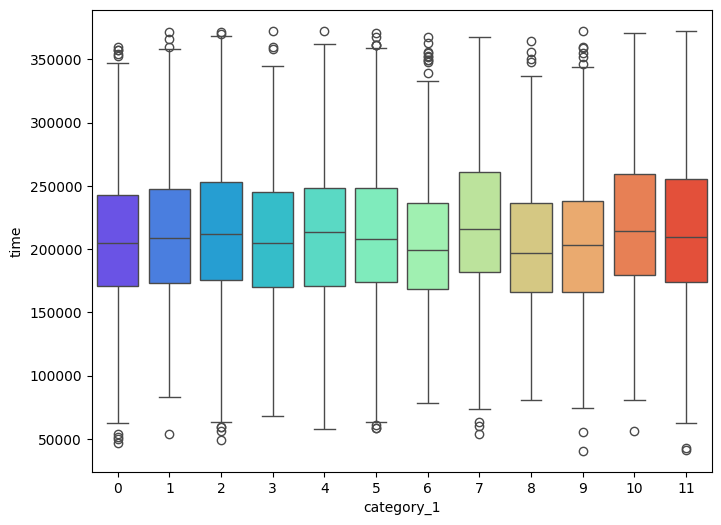

In [386]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'category_1', y = 'time', data = store_data, palette = 'rainbow')

In [383]:
store_data['time'].quantile(0.96)

372600.0

In [384]:
r1 = store_data['time'].quantile(0.96)
r2 = store_data['score_2'].quantile(0.36)

In [385]:
store_data = store_data.loc[(store_data['time'] <= r1)]
store_data.describe()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,0.577028,0.476891,5.185435,-11.983108,0.645988,0.479254,0.305814,0.086091,0.445299,114.115710,212060.809171,3.870308
std,0.186590,0.291301,3.556394,7.947858,0.478267,0.377863,0.408297,0.013673,0.271381,28.334473,60432.136296,0.497785
min,0.159000,0.000953,0.000000,-35.606000,0.000000,0.000002,0.000000,0.053200,0.019100,35.822000,40640.000000,1.000000
25%,0.452000,0.207000,2.000000,-15.681000,0.000000,0.094900,0.000001,0.076400,0.206000,92.521000,172611.000000,4.000000
50%,0.595000,0.509000,5.000000,-9.184000,1.000000,0.427000,0.001320,0.088900,0.427000,113.965000,207333.000000,4.000000
75%,0.719000,0.722000,8.000000,-6.123000,1.000000,0.891000,0.843000,0.097900,0.668000,132.569000,248660.000000,4.000000
max,0.984000,0.994000,11.000000,-0.179000,1.000000,0.996000,0.993000,0.104000,0.983000,179.669000,372600.000000,5.000000


In [387]:
store_data.shape

(4449, 12)

In [377]:
store_data.head()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity,sstore_presence_zscore
4,0.756,0.6090,3,-7.927,1,0.217,0.00474,0.0960,0.537,117.023,155720,4,-0.648288
9,0.532,0.0872,4,-20.407,0,0.954,0.95400,0.0951,0.187,131.494,185829,4,1.315513
13,0.373,0.1120,7,-22.063,1,0.992,0.91400,0.1040,0.501,110.651,144264,4,1.416767
26,0.614,0.6140,8,-11.339,0,0.505,0.00174,0.0561,0.557,159.971,348083,4,0.119113
28,0.596,0.3240,2,-16.706,1,0.799,0.92600,0.1020,0.640,170.038,446120,4,0.902502


In [378]:
store_data = store_data.drop(columns = {
    'sstore_presence_zscore'
}, axis = 1)

In [379]:
store_data.head()

,store_ratio,basket_ratio,category_1,store_score,category_2,store_presence,score_1,score_2,score_3,score_4,time,popularity
4,0.756,0.6090,3,-7.927,1,0.217,0.00474,0.0960,0.537,117.023,155720,4
9,0.532,0.0872,4,-20.407,0,0.954,0.95400,0.0951,0.187,131.494,185829,4
13,0.373,0.1120,7,-22.063,1,0.992,0.91400,0.1040,0.501,110.651,144264,4
26,0.614,0.6140,8,-11.339,0,0.505,0.00174,0.0561,0.557,159.971,348083,4
28,0.596,0.3240,2,-16.706,1,0.799,0.92600,0.1020,0.640,170.038,446120,4


In [388]:
store_data.to_csv('store_data_updated.csv',index = False)